<a href="https://colab.research.google.com/github/benvictoria21/MachineLearning/blob/master/house_price_prediction_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib
import tensorflow as tf

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"Tensorflow version : Tensorflow {tf.__version__}")

#Magic function to display In-Notebook display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='deep')

Numpy version : Numpy 1.18.5
Pandas version : Pandas 1.1.4
Matplotlib version : Matplotlib 3.2.2
Seaborn version : Seaborn 0.11.0
Tensorflow version : Tensorflow 2.3.0


In [4]:
# df = pd.read_csv("kc_house_data.csv", encoding = 'latin-1')
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/MachineLearning/master/dataset/kc_house_data.csv')

In [5]:
df.head(8).T

,0,1,2,3,4,5,6,7
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850
bedrooms,3,3,2,4,3,4,3,3
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5
sqft_living,1180,2570,770,1960,1680,5420,1715,1060
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711
floors,1,2,1,1,1,1,2,1
waterfront,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [10]:
# Dealing with missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.shape

(21613, 21)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(21613, 21)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


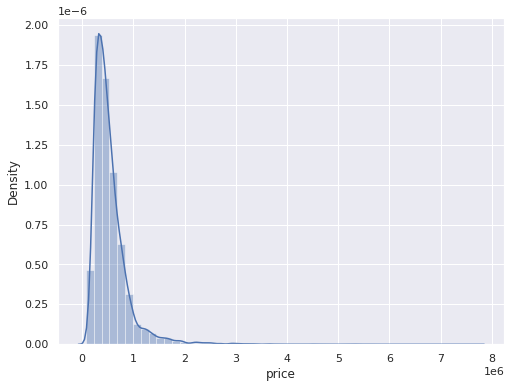

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


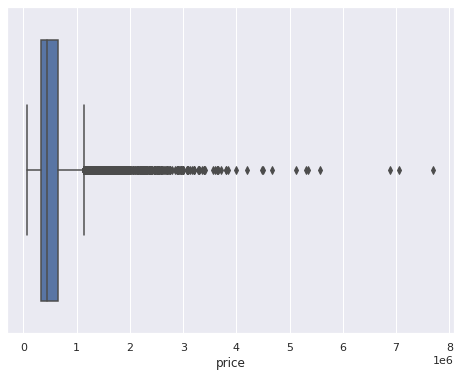

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(df['price'])
plt.show()

In [16]:
# Create a function to return the outliers
def detect_outliers(x, c = 1.5):
    q1, q3 = np.percentile(x, [25,75])
    #print("q1 - ",q1, " q3 - ", q3)
    
    iqr = (q3 - q1)
    #print("iqr --", iqr)
    
    lob = q1 - (iqr * c)
    #print("lob - ",lob)
    
    uob = q3 + (iqr * c)
    #print("uob - ",uob)
    
    # Generate outliers
    indicies = np.where((x > uob) | (x < lob))

    return indicies

In [17]:
# Detect all Outliers 
priceOutliers = detect_outliers(df['price'])
print("Total Outliers count : ",len(priceOutliers[0]))

Total Outliers count :  1146


In [18]:
df.shape

(21613, 21)

In [19]:
# Remove outliers
df = df.drop(priceOutliers[0])

In [20]:
df.shape

(20467, 21)

In [21]:
df.corr()['price'].sort_values(ascending=False).head(10)

price            1.000000
grade            0.631182
sqft_living      0.622333
sqft_living15    0.562090
sqft_above       0.530451
bathrooms        0.455927
lat              0.430762
bedrooms         0.296956
floors           0.273987
view             0.238268
Name: price, dtype: float64

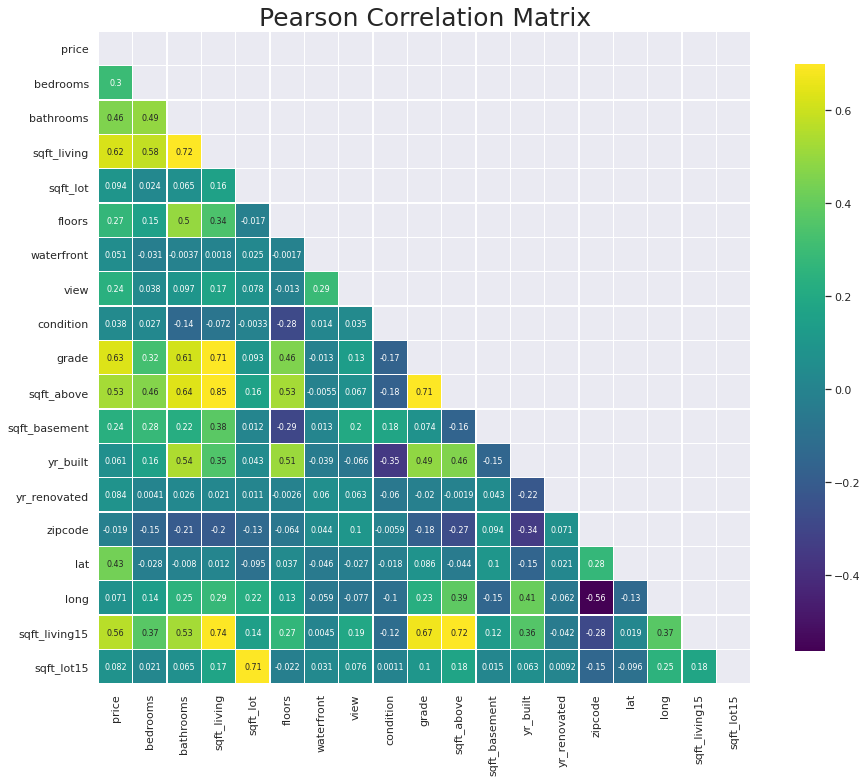

In [22]:
features = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="viridis",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

plt.show()

In [23]:
df.corr()['sqft_living'].sort_values(ascending=False).head(10)

sqft_living      1.000000
sqft_above       0.853561
sqft_living15    0.738190
bathrooms        0.716684
grade            0.705620
price            0.622333
bedrooms         0.584609
sqft_basement    0.376601
yr_built         0.353754
floors           0.340731
Name: sqft_living, dtype: float64

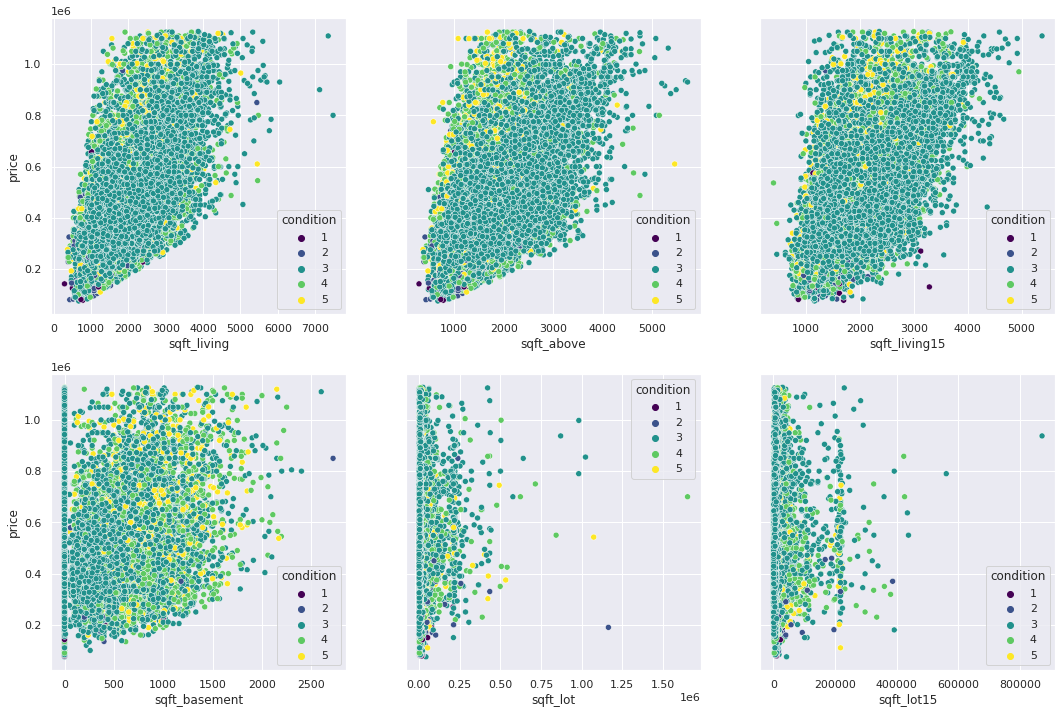

In [24]:
fig, axs = plt.subplots( nrows=2, ncols=3, sharey=True, figsize=(18,12))

sns.scatterplot(y='price',x='sqft_living',data=df, hue='condition', palette='viridis', ax=axs[0,0])
sns.scatterplot(y='price',x='sqft_above',data=df, hue='condition', palette='viridis', ax=axs[0,1])
sns.scatterplot(y='price',x='sqft_living15',data=df, hue='condition', palette='viridis', ax=axs[0,2])

sns.scatterplot(y='price',x='sqft_basement',data=df, hue='condition', palette='viridis', ax=axs[1,0])
sns.scatterplot(y='price',x='sqft_lot',data=df, hue='condition', palette='viridis', ax=axs[1,1])
sns.scatterplot(y='price',x='sqft_lot15',data=df, hue='condition', palette='viridis', ax=axs[1,2])


plt.show()

[]

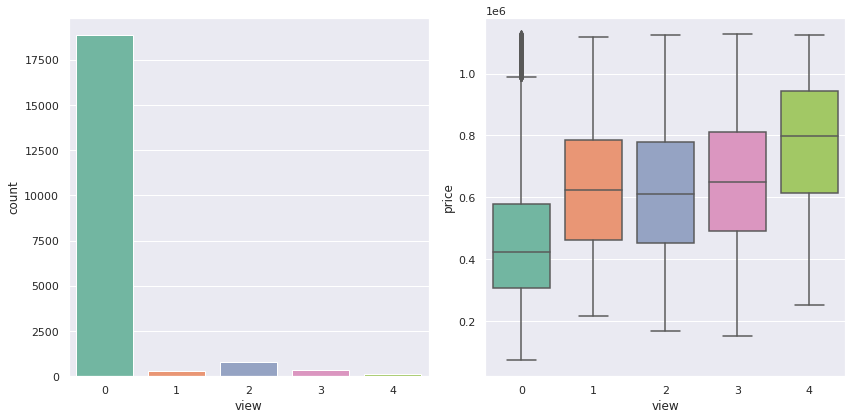

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='view',data=df, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='view',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.plot()

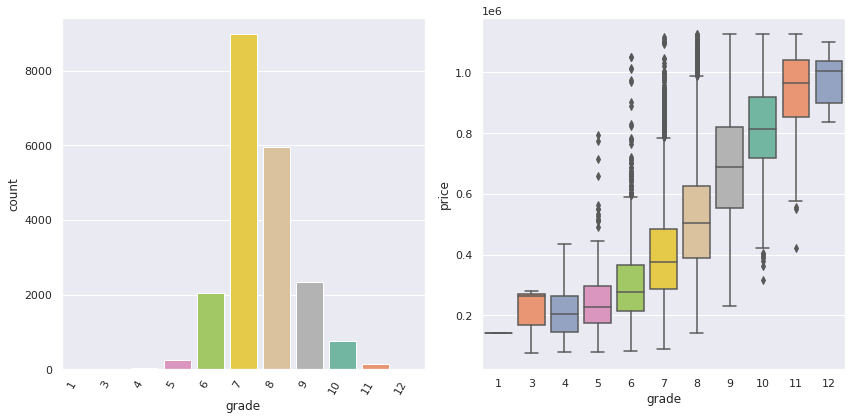

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

ax = sns.countplot(x='grade',data=df, palette='Set2', ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.boxplot(y='price',x='grade',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

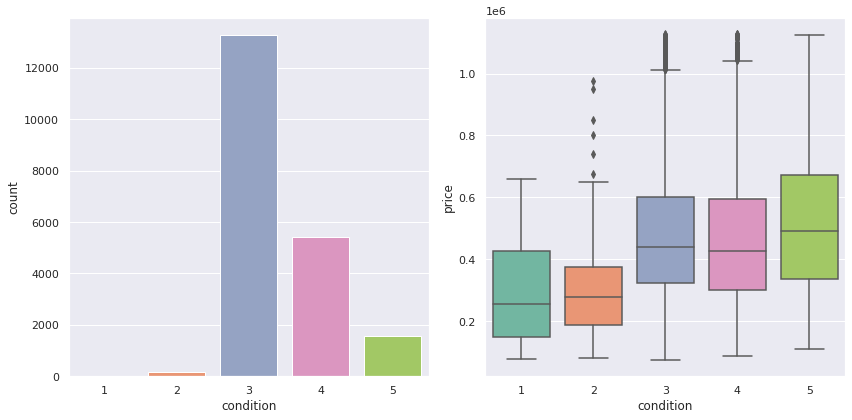

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='condition',data=df, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='condition',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

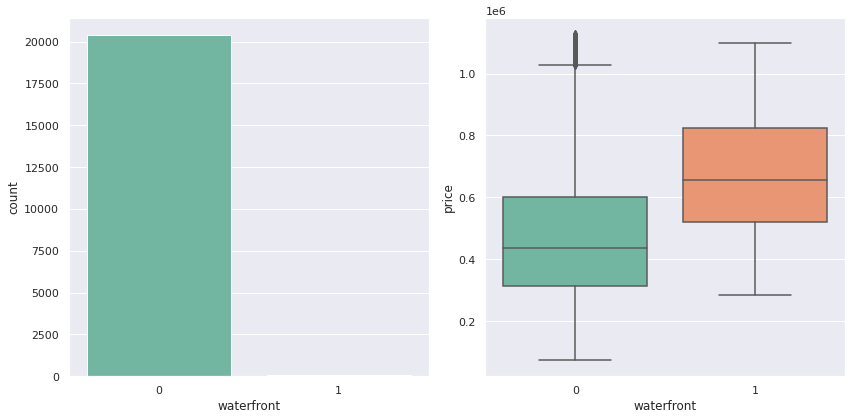

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='waterfront',data=df, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='waterfront',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

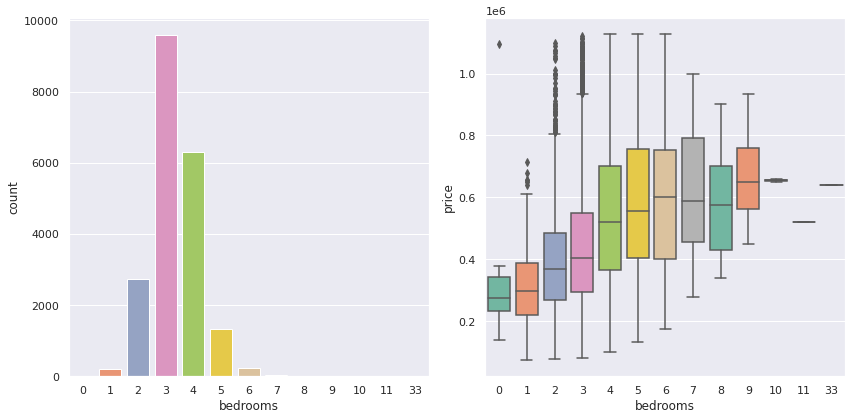

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='bedrooms',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='bedrooms',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

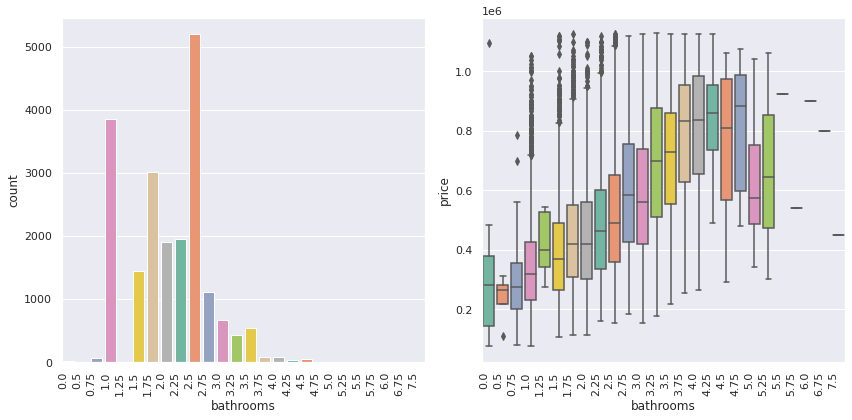

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

chart1 = sns.countplot(x='bathrooms',data=df, palette='Set2',ax=axs[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90, horizontalalignment='right')

chart2 = sns.boxplot(y='price',x='bathrooms',data=df, palette='Set2', ax=axs[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

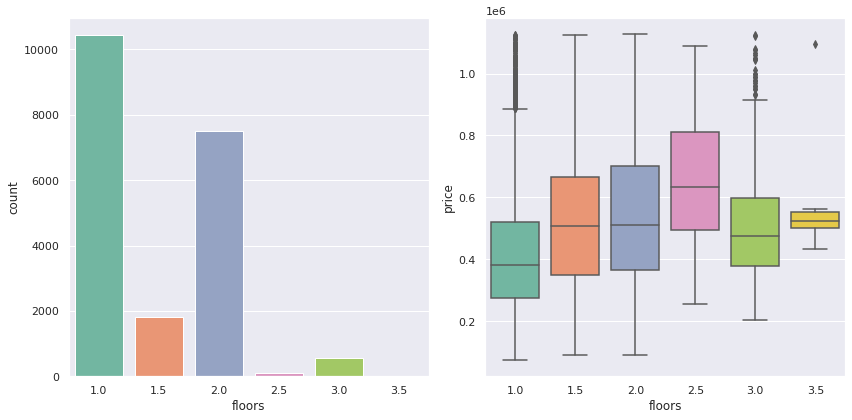

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='floors',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='floors',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

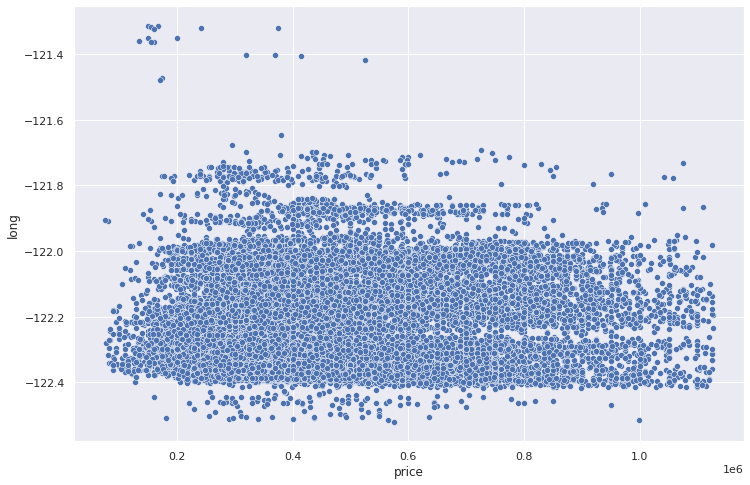

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)
plt.show()

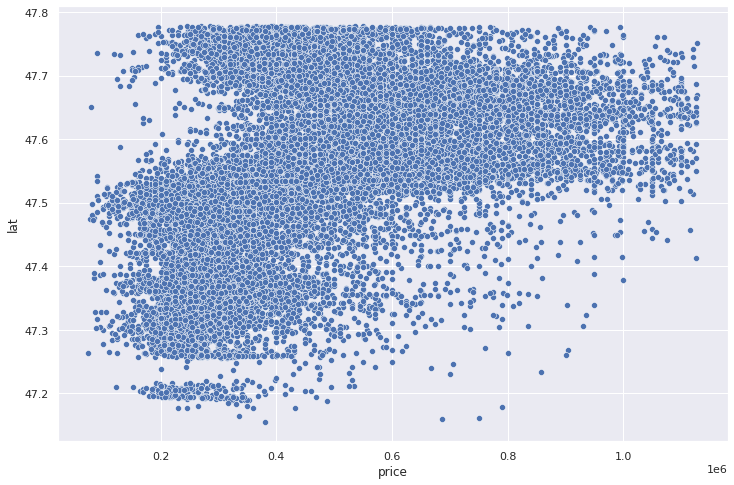

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)
plt.show()

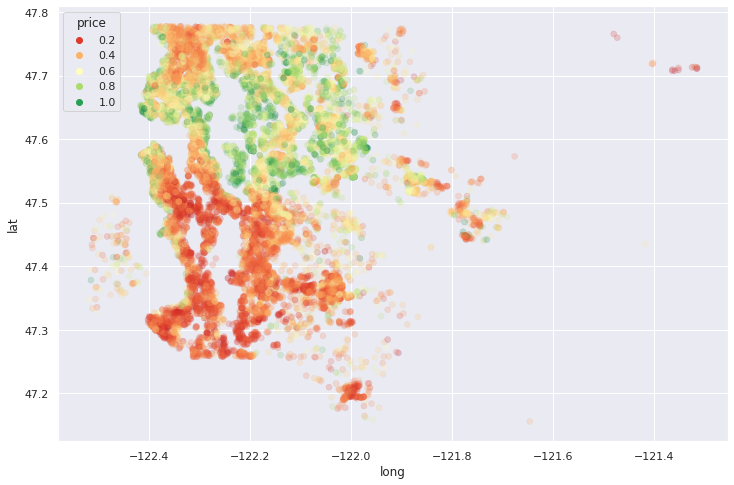

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=df,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20467 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20467 non-null  int64  
 1   date           20467 non-null  object 
 2   price          20467 non-null  float64
 3   bedrooms       20467 non-null  int64  
 4   bathrooms      20467 non-null  float64
 5   sqft_living    20467 non-null  int64  
 6   sqft_lot       20467 non-null  int64  
 7   floors         20467 non-null  float64
 8   waterfront     20467 non-null  int64  
 9   view           20467 non-null  int64  
 10  condition      20467 non-null  int64  
 11  grade          20467 non-null  int64  
 12  sqft_above     20467 non-null  int64  
 13  sqft_basement  20467 non-null  int64  
 14  yr_built       20467 non-null  int64  
 15  yr_renovated   20467 non-null  int64  
 16  zipcode        20467 non-null  int64  
 17  lat            20467 non-null  float64
 18  long  

In [36]:
df = df.drop('id',axis=1)

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df['month'] = df['date'].apply(lambda date : date.month)

In [39]:
df['year'] = df['date'].apply(lambda date : date.year)

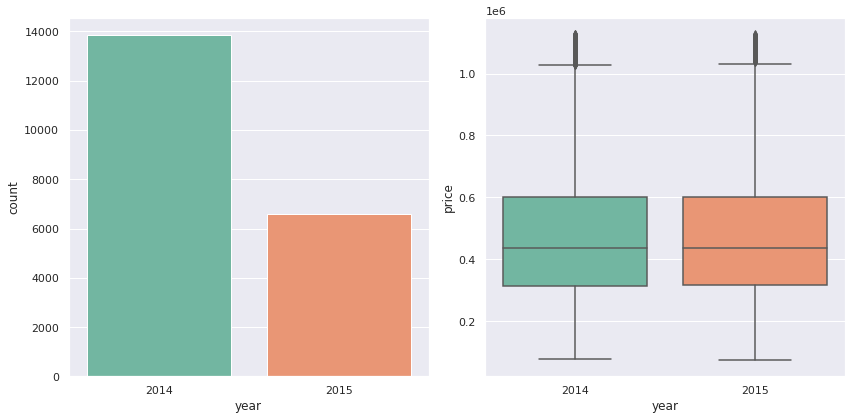

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='year',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='year',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

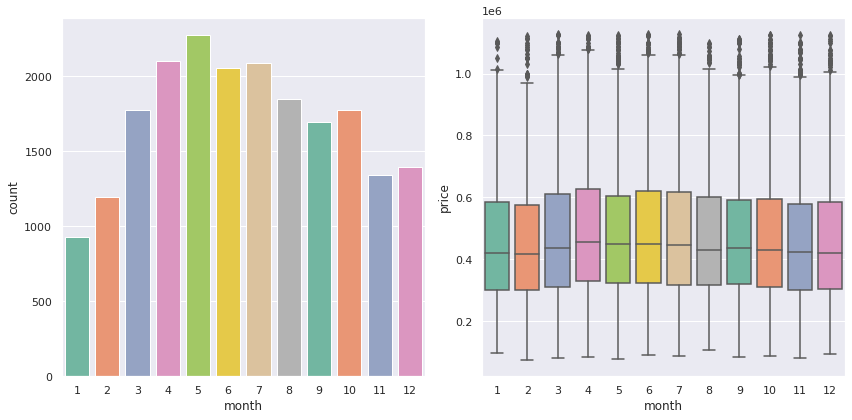

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='month',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='month',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

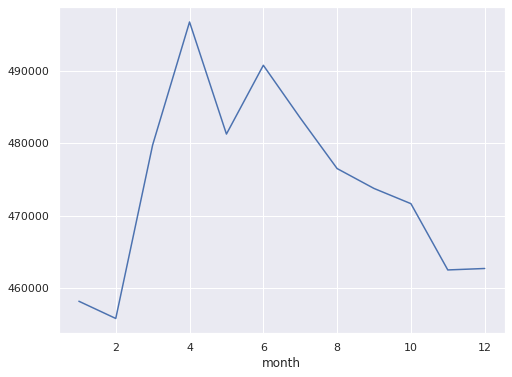

In [42]:
plt.figure(figsize=(8,6))
df.groupby('month').mean()['price'].plot()

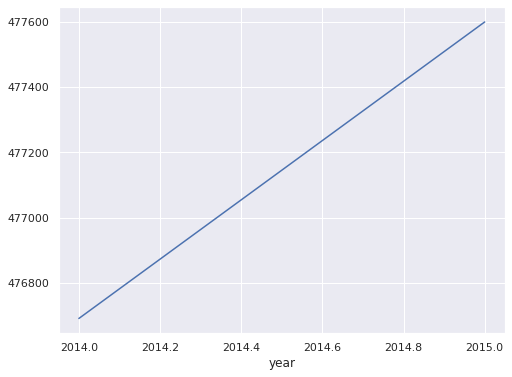

In [43]:
plt.figure(figsize=(8,6))
df.groupby('year').mean()['price'].plot()

In [44]:
# Drop the date columns after doing feature engineering.
df = df.drop('date',axis=1)

In [45]:
df['zipcode'].value_counts()

98103    590
98038    588
98052    563
98115    558
98042    548
        ... 
98102     89
98109     86
98024     74
98148     57
98039      6
Name: zipcode, Length: 70, dtype: int64

In [46]:
df = df.drop('zipcode',axis=1)

In [47]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       19701
2014       82
2013       34
2000       30
2007       29
        ...  
1956        1
1948        1
1944        1
1934        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [48]:
df['renovated'] = df['yr_renovated'].apply(lambda yr : 0 if yr==0 else 1)

In [49]:
df['renovated'].value_counts()

0    19701
1      766
Name: renovated, dtype: int64

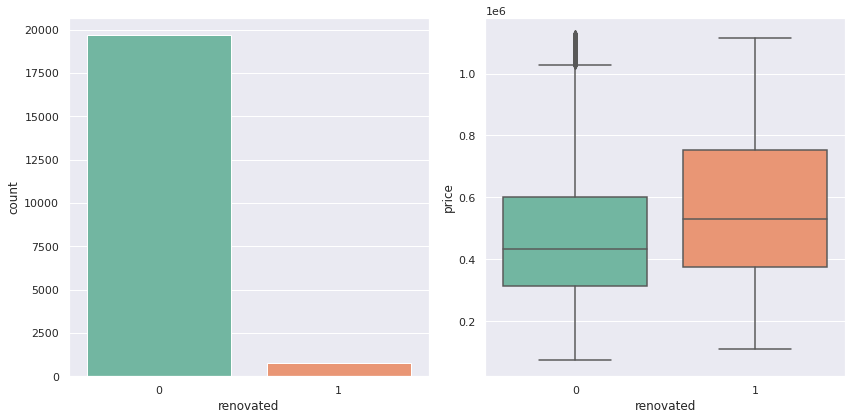

In [50]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='renovated',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='renovated',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

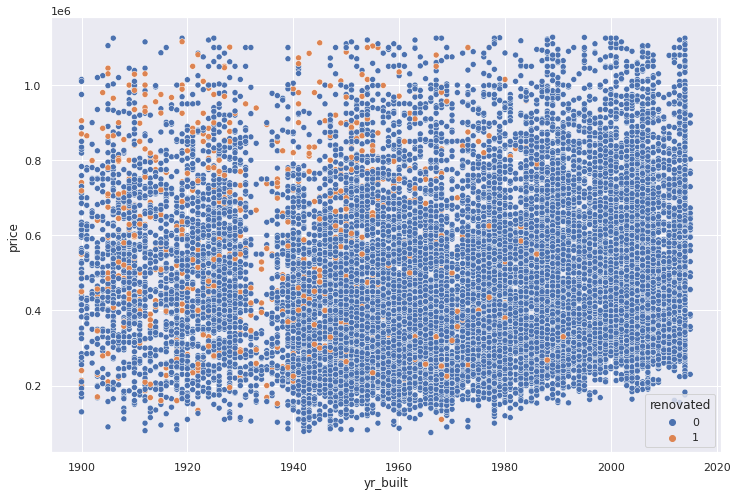

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='yr_built', y='price',hue='renovated' ,data=df)
plt.show()

In [52]:
# Separate Target Variable and Predictor Variables
# Also please note that to call the values here because tensor flow may work with numeric array, and it can't work with pandas dataframes.
X = df.drop('price',axis=1).values
y = df['price'].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (14326, 20)
y_train -  (14326,)
X_test -  (6141, 20)
y_test -  (6141,)


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
np.min(X_train)

0.0

In [58]:
np.max(X_train)

1.0

In [59]:
X_train.shape[1]

20

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [61]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [62]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
112/112 [==============================] - 1s 5ms/step - loss: 272915775488.0000 - val_loss: 266227220480.0000
Epoch 2/400
112/112 [==============================] - 0s 3ms/step - loss: 271976792064.0000 - val_loss: 262926598144.0000
Epoch 3/400
112/112 [==============================] - 0s 3ms/step - loss: 258290778112.0000 - val_loss: 231923318784.0000
Epoch 4/400
112/112 [==============================] - 0s 3ms/step - loss: 192691437568.0000 - val_loss: 128800620544.0000
Epoch 5/400
112/112 [==============================] - 0s 3ms/step - loss: 75939422208.0000 - val_loss: 34762215424.0000
Epoch 6/400
112/112 [==============================] - 0s 3ms/step - loss: 30790074368.0000 - val_loss: 28354041856.0000
Epoch 7/400
112/112 [==============================] - 0s 4ms/step - loss: 29207678976.0000 - val_loss: 28053182464.0000
Epoch 8/400
112/112 [==============================] - 0s 3ms/step - loss: 28880773120.0000 - val_loss: 27740059648.0000
Epoch 9/400
112/112 [===

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [64]:
losses = pd.DataFrame(model.history.history)

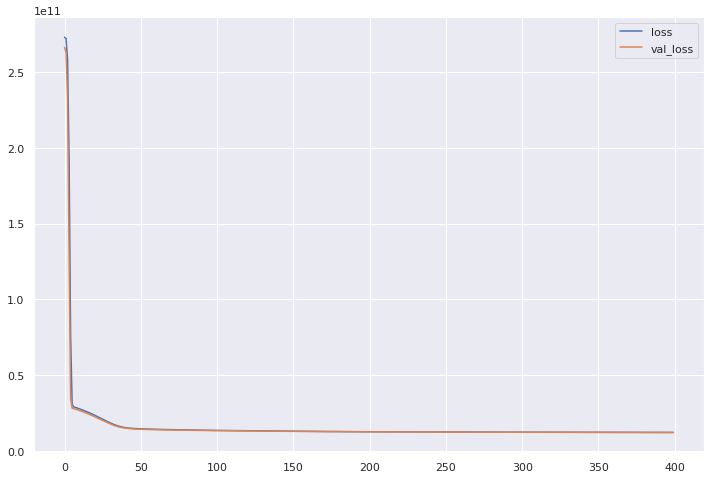

In [65]:
losses.plot(figsize=(12,8))

In [66]:
from sklearn import metrics

def measure_accuracy(original, predicted, train=True):  
    mae = metrics.mean_absolute_error(original, predicted)
    mse = metrics.mean_squared_error(original, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(original, predicted))
    #rmsle = np.sqrt(metrics.mean_squared_log_error(original, predicted))
    r2_square = metrics.r2_score(original, predicted)
    evs = metrics.explained_variance_score(original,predicted)
    
    if train:
        print("Training Result : ")
        print('------------------')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        #print('RMSLE: {0:0.3f}'.format(rmsle))
        print('Explained Variance Score: {0:0.3f}'.format(evs))
        print('R2 Square: {0:0.3f}'.format(r2_square))
        print('\n')
    elif not train:
        print("Testing Result : ")
        print('------------------')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        #print('RMSLE: {0:0.3f}'.format(rmsle))
        print('Explained Variance Score: {0:0.3f}'.format(evs))
        print('R2 Square: {0:0.3f}'.format(r2_square))

In [67]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

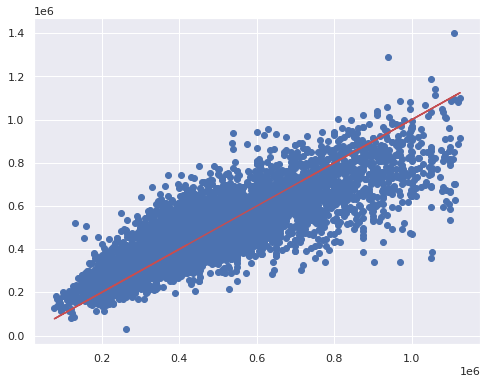

In [68]:
plt.figure(figsize=(8,6))
# Our predictions
plt.scatter(y_test,y_test_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [69]:
errors = y_test.reshape(6141, 1) - y_test_pred

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


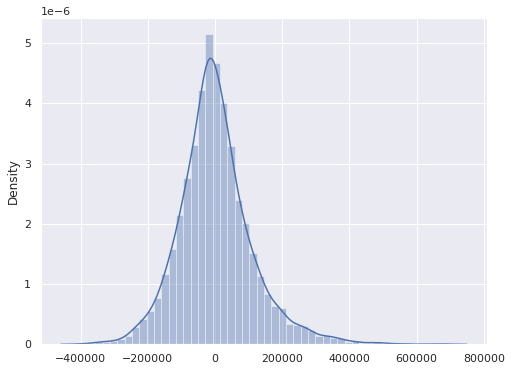

In [70]:
plt.figure(figsize=(8,6))
sns.distplot(errors)

In [71]:
measure_accuracy(y_train, y_train_pred, train=True)
measure_accuracy(y_test, y_test_pred, train=False)

Training Result : 
------------------
MAE: 81886.592
MSE: 12318130391.635
RMSE: 110987.073
Explained Variance Score: 0.720
R2 Square: 0.720


Testing Result : 
------------------
MAE: 80962.561
MSE: 12267640784.435
RMSE: 110759.382
Explained Variance Score: 0.709
R2 Square: 0.709


In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

measure_accuracy(y_train, y_train_pred, train=True)
measure_accuracy(y_test, y_test_pred, train=False)

Training Result : 
------------------
MAE: 86724.110
MSE: 13110937694.227
RMSE: 114503.003
Explained Variance Score: 0.702
R2 Square: 0.702


Testing Result : 
------------------
MAE: 86035.753
MSE: 13060566946.087
RMSE: 114282.837
Explained Variance Score: 0.690
R2 Square: 0.690
